In [66]:
import requests
import base64
import spotipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spotipy.oauth2 import SpotifyClientCredentials

In [67]:
# Define client credentials
CLIENT_ID = '49b8247f173447b3a2bf1bda588153c4'
CLIENT_SECRET = '43fd0edf8b0e495c81dc1b38cc237b77'
SPOTIFY_TOKEN = 'BQCsdWDSVNddp0FBl52y5zaLXhrJu0uHQ9jjmxNnT6XC-9TE1hD_ZL_-0cQCeKk-v9uv4bbrQ0DzcWNDNi7D3hrCDI3WC9cA9PSLORSAt7_U4VRw0Sk'


### Code for token
# Concatenate client ID and client secret separated by a colon
client_credentials = f"{CLIENT_ID}:{CLIENT_SECRET}"

# Encode the client credentials using base64
encoded_credentials = base64.b64encode(client_credentials.encode()).decode()
print(encoded_credentials)
# Define headers and payload for the request
headers = {
    'Authorization': f'Basic {encoded_credentials}',
}
payload = {
    'grant_type': 'client_credentials',
}

# Make the POST request to obtain the access token
response = requests.post('https://accounts.spotify.com/api/token', headers=headers, data=payload)

# Parse the JSON response
if response.status_code == 200:
    SPOTIFY_TOKEN = response.json()['access_token']
else:
    print(f"Failed to obtain access token. Status code: {response.status_code}")

### start spotipy 
auth_manager = SpotifyClientCredentials(client_id=CLIENT_ID,client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(auth=SPOTIFY_TOKEN)

sp.me

NDliODI0N2YxNzM0NDdiM2EyYmYxYmRhNTg4MTUzYzQ6NDNmZDBlZGY4YjBlNDk1YzgxZGMxYjM4Y2MyMzdiNzc=


<bound method Spotify.me of <spotipy.client.Spotify object at 0x000001B9661545B0>>

In [21]:
results = sp.search(q='track:'+'shape of you artist:Ed Sheeran',type='track',limit=20)
results['tracks']

items_in_track = results['tracks']['items']
if len(items_in_track) > 0:
        for item in items_in_track:
             print(item['name'] + " - By - " + item['artists'][0]['name'])
             print("Track ID: " + item['id'])
             print("-----")


Shape of You - By - Ed Sheeran
Track ID: 7qiZfU4dY1lWllzX7mPBI3
-----
Shape of You - Acoustic - By - Ed Sheeran
Track ID: 5ULRlgiSPSKTaJN1vU9yso
-----
Shape of You (feat. Nyla & Kranium) - Major Lazer Remix - By - Ed Sheeran
Track ID: 1KqvRRQd3lfM0pAlkGPrgD
-----
Shape of You (feat. Zion & Lennox) - Latin Remix - By - Ed Sheeran
Track ID: 5nCtCCB5i1OfbADvynNw0i
-----
Shape of You - Galantis Remix - By - Ed Sheeran
Track ID: 5H7CwzYZ60e7w69tX4ivQN
-----
Shape of You - Stormzy Remix - By - Ed Sheeran
Track ID: 2NHSYwGkAvPHzCinY0KwXo
-----
Shape of You - NOTD Remix - By - Ed Sheeran
Track ID: 1dVWoeam7D1Zg6hB57pBE7
-----
Shape of You - By - Ed Sheeran
Track ID: 0fed0fUD5T4GAW8XBEq020
-----
Shape of You - By - Ed Sheeran
Track ID: 1Pp1XzwIXOxj2cb4c6Mkaw
-----
Shape of You - Yxng Bane Remix - By - Ed Sheeran
Track ID: 31OUf7myzRshUdO8aQpEPH
-----
Shape of You - By - Ed Sheeran
Track ID: 35MgZi6XdYJiDnsgSfVOHB
-----
Shape of You - By - Ed Sheeran
Track ID: 4MiHjUrW3kZnorfCMCDn8I
-----
Shape 

In [22]:
track_features = sp.audio_features('7qiZfU4dY1lWllzX7mPBI3')
track_features

[{'danceability': 0.825,
  'energy': 0.652,
  'key': 1,
  'loudness': -3.183,
  'mode': 0,
  'speechiness': 0.0802,
  'acousticness': 0.581,
  'instrumentalness': 0,
  'liveness': 0.0931,
  'valence': 0.931,
  'tempo': 95.977,
  'type': 'audio_features',
  'id': '7qiZfU4dY1lWllzX7mPBI3',
  'uri': 'spotify:track:7qiZfU4dY1lWllzX7mPBI3',
  'track_href': 'https://api.spotify.com/v1/tracks/7qiZfU4dY1lWllzX7mPBI3',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7qiZfU4dY1lWllzX7mPBI3',
  'duration_ms': 233713,
  'time_signature': 4}]

In [23]:
df = pd.DataFrame(track_features, index=[0])
df_features = df.loc[:, ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]
df_features

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.581,0.825,0.652,0,0.0931,0.0802,0.931


In [26]:
def feature_plot(features):
    labels = list(features)[:]
    stats = features.mean().tolist()

    angles = np.linspace(0, 2*np.pi, len(labels), endpoint = False)

    stats = np.concatenate((stats, [stats[0]]))
    angles = np.concatenate((angles,[angles[0]]))

    fig = plt.figure(figsize=(18,18))

    ax = fig.add_subplot(221, polar = True)
    ax.plot(angles, stats, 'o-', linewidth = 2, label = 'Features', color = 'gray')
    ax.fill(angles, stats, alpha = 0.25, facecolor = 'gray')
    ax.set_thetagrids(angles[0:7]*180/np.pi, labels, fontsize = 13)

    ax.set_rlabel_position(250)
    plt.yticks([0.2, 0.4, 0.6, 0.8], ['0.2', '0.4', '0.6', '0.8'], color = 'gray', size = 12)
    plt.ylim(0,1)

    plt.legend(loc = 'best', bbox_to_anchor = (0.1, 0.1))

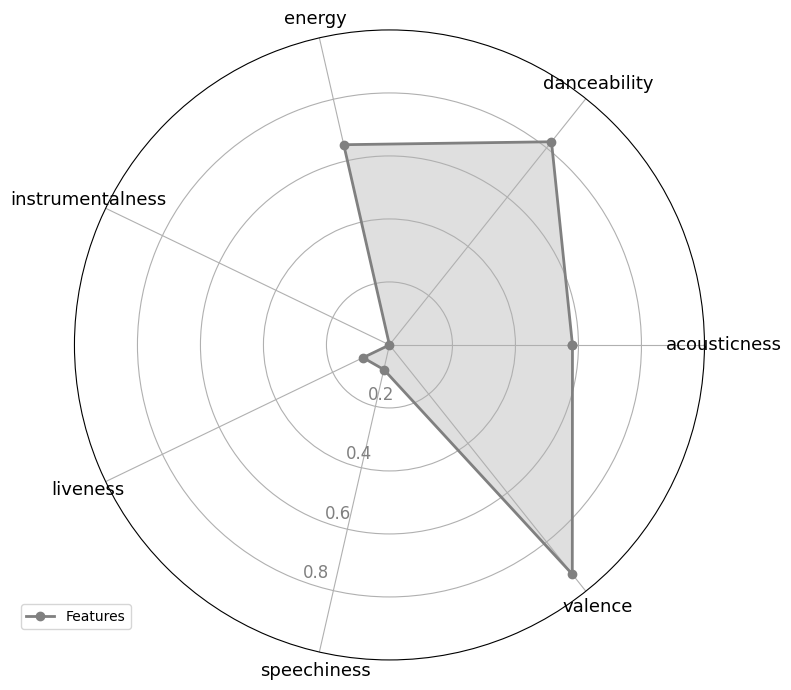

In [27]:
feature_plot(df_features)

In [8]:
def get_features(track_id):
    track_features = sp.audio_features(track_id)
    df = pd.DataFrame(track_features, index=[0])
    df_features = df.loc[:, ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]
    return df_features

def get_trackID(track_name, artist):
    query = f"track:{track_name} artist:{artist}"
    results = sp.search(q=query, type = 'track', limit = 1)
    if results['tracks']['items']:
        track_id = results['tracks']['items'][0]['id']
        return track_id
    else:
        return None

In [73]:
print(get_trackID('shaPe of You', 'ed sheeran'))

HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'track:shaPe of You artist:ed sheeran', 'limit': 1, 'offset': 0, 'type': 'track', 'market': None} returned 401 due to The access token expired


SpotifyException: http status: 401, code:-1 - https://api.spotify.com/v1/search?q=track%3AshaPe+of+You+artist%3Aed+sheeran&limit=1&offset=0&type=track:
 The access token expired, reason: None

In [69]:
def get_trackID(track_name, artist):
    """
    Returns the Spotify ID of a track (Not case sensitive)
    Params: track_name, the name of the track (required)
            artist, the name of the artist (optional)
    """
    if artist:
        query = f"track:{track_name} artist:{artist}"
    else:
        query = f"track:{track_name}"

    results = sp.search(q=query,type='track',limit=1)
    if results['tracks']['items']:
        track_id = results['tracks']['items'][0]['id']
        return track_id
    else:
        print('Track ID not found. It may not exist in the Spotify library. Please confirm track_name and artist are valid and retry.')
        return None

def get_features(track_id):
    """
    Returns the statistic features of the track
    Params: track_id, the spotify ID of the track
    """
    track_features = sp.audio_features(track_id)
    df = pd.DataFrame(track_features, index = [0])
    df_features = df.loc[:, ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]
    return df_features

def feature_plot(features, figsize):
    """
    Creates a hexagonal rating graph for one feature set.
    Param: features (list containing 6 statistics ranging 0-1), figsize (int)
    Example: 
    fig = feature_plot(df_features, 18)
    plt.show()
    """
    labels = list(features)[:]
    stats = features.mean().tolist()

    angles = np.linspace(0, 2*np.pi, len(labels), endpoint = False)

    stats = np.concatenate((stats, stats[0]))
    angles = np.concatenate((angles, [angles[0]]))

    fig = plt.figure(figsize=(figsize,figsize))

    ax = fig.add_subplot(221, polar = True)
    ax.plot(angles, stats, 'o-', linewidth = 2, label = 'Features', color = 'gray')
    ax.fill(angles, stats, alpha = 0.25, facecolor = 'gray')
    ax.set_thetagrids(angles[0:7]*180/np.pi, labels, fontsize = 13)

    ax.set_rlabel_position(250)
    plt.yticks([0.2, 0.4, 0.6, 0.8], ['0.2', '0.4', '0.6', '0.8'], color = 'gray', size = 12)
    plt.ylim(0,1)

    plt.legend(loc = 'best', bbox_to_anchor = (0.1, 0.1))

    return fig

def feature_plot2(feature1, feature2, figsize):
    labels = list(feature1)[:]
    stats = feature1.mean().tolist()
    stats2 = feature2.mean().tolist()

    angles = np.linspace(0, 2*np.pi, len(labels), endpoint = False)

    stats = np.concatenate((stats, [stats[0]]))
    stats2 = np.concatenate((stats2, [stats2[0]]))
    angles = np.concatenate((angles, [angles[0]]))

    fig = plt.figure(figsize=(figsize,figsize))

    ax = fig.add_subplot(221, polar = True)
    ax.plot(angles, stats, 'o-', linewidth = 2, label = 'Features 1', color = 'gray')
    ax.fill(angles, stats, alpha = 0.25, facecolor = 'r')
    ax.set_thetagrids(angles[0:7] * 180/np.pi, labels, fontsize = 13)

    ax.set_rlabel_position(250)
    plt.yticks([0.2, 0.4, 0.6, 0.8], ['0.2','0.4','0.6','0.8'], color = 'gray', size = '12')
    plt.ylim(0, 1)

    ax.plot(angles, stats2, 'o-', linewidth = 2, label = 'Feature 2', color = 'm')
    ax.fill(angles, stats2, alpha = 0.25, facecolor = 'b')
    ax.set_title('Mean Values of the audio features')
    ax.grid(True)

    plt.legend(loc = 'best', bbox_to_anchor = (0.1, 0.1))

    return fig

def get_track_recommendation(track_id, limit):
    """
    Gets X amount of recommendations for a track.
    Param: track_id, limit (int)
    Return: JSON response
    """
    limit = limit
    recUrl = f"https://api.spotify.com/v1/recommendations?limit={limit}&seed_tracks={track_id}"

    header = {
        "Authorization": "Bearer " + SPOTIFY_TOKEN
    }

    res = requests.get(url=recUrl, headers = header)
    return res.json()

def get_recommendation_features(json_response):
    """
    Extract the analytical stats of each track in a json_response
    Param: json_response
    Return: Dataframe of features
    """
    feat_df = pd.DataFrame()

    for track in json_response['tracks']:
        audio_feat = sp.audio_features(track['id'])
        local_feat = pd.DataFrame(audio_feat, index=[0])
        local_feat.insert(0, 'track_id', track['id'])
        feat_df = pd.concat([feat_df, local_feat], ignore_index=True)
        
    return feat_df

def feat_similarity(feature1, feature2, method):
    """
    Calculates similarity of both lists using pearson correlation coefficient or euclidean_norm
    Return: value between 0 to 1
    Param: feature1 (panda Dataframe, or a list), feature2 (Dataframe or list)
        method: 'pearson' or 'euclidean_norm'
    """
    if method.lower() == 'pearson':
        return np.corrcoef(np.array(feature1), np.array(feature2))[0, 1]
    if method.lower() == 'euclidean_norm':
        euclidean_distance = np.linalg.norm(np.array(feature1) - np.array(feature2))
        euclidean_distance = 1 / (1 + euclidean_distance)
        return euclidean_distance
    return None

def recommend_from_track(title, artist, search_limit, method, threshold, show_limit):
    """
    Using track title and artist, create a list of recommendations with high similarity
    Note: If pearson, 0.9 threshold is recommended. If Euclidean_norm, 0.75 threshold is recommended
    Param:
        title (string), artist (optional string)
        search_limit: the number of tracks searched for comparison (int)
        method: the method used for comparison ('pearson','euclidean_norm')
        threshold: the required level of similarity
        show_limit: the number of recommendations showed
    Return:
        A pd.DataFrame containing the track titles, artists, duration and popularity (for UI).
        A pd.DataFrame containing the track features (for graphing).
    """
    track_id = get_trackID(title, artist)
    recommendation_list = get_track_recommendation(track_id, search_limit)
    track_feature = get_features(track_id)

    recommendation_feats = get_recommendation_features(recommendation_list)
    recommendation_list = pd.DataFrame(recommendation_list['tracks'])

    final_rec_feats, final_rec_similarity, final_recommendation_list = pd.DataFrame(), [], pd.DataFrame()
    for index in range(1, 20):
        rec = recommendation_feats.iloc[index]
        rec_features = rec[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]
        sim = feat_similarity(track_feature, rec_features.tolist(), method)
        if  sim > threshold:
            final_rec_feats = pd.concat([rec_features.to_frame().T, final_rec_feats], ignore_index=True)
            final_rec_similarity.append({sim})
            final_recommendation_list = pd.concat([recommendation_list.iloc[index].to_frame().T,final_recommendation_list], ignore_index=True)
        else:
            continue

    final_rec_similarity = pd.DataFrame(final_rec_similarity)
    final_rec_similarity.columns = ['similarity']

    final_recommendation_list = pd.concat([final_recommendation_list, final_rec_similarity], axis=1)
    final_recommendation_list = final_recommendation_list[['name', 'artists', 'duration_ms', 'popularity', 'similarity']].iloc[:show_limit]
    
    return final_recommendation_list, final_rec_feats



In [70]:
get_trackID('Nightcall','')

'0U0ldCRmgCqhVvD6ksG63j'

In [48]:
final_recommendation_list, final_rec_feats = recommend_from_track('Idol', 'Yoasobi', 20, 'euclidean_norm', 0.65, 10)

In [65]:
final_recommendation_list.iloc[1]

name                                        Let's Get It Started
artists        [{'external_urls': {'spotify': 'https://open.s...
duration_ms                                               193573
popularity                                                    48
similarity                                              0.730379
Name: 1, dtype: object

In [39]:
def feature_plot2(features1, feature2s):
    labels = list(features1)[:]
    stats = features1.mean().tolist()
    stats2 = feature2s.mean().tolist()

    angles = np.linspace(0, 2*np.pi, len(labels), endpoint = False)

    stats = np.concatenate((stats, [stats[0]]))
    stats2 = np.concatenate((stats2, [stats2[0]]))
    angles = np.concatenate((angles, [angles[0]]))

    fig = plt.figure(figsize = (18,18))

    ax = fig.add_subplot(221, polar = True)
    ax.plot(angles, stats, 'o-', linewidth = 2, label = 'Features 1', color = 'gray')
    ax.fill(angles, stats, alpha = 0.25, facecolor = 'r')
    ax.set_thetagrids(angles[0:7] * 180/np.pi, labels, fontsize = 13)

    ax.set_rlabel_position(250)
    plt.yticks([0.2, 0.4, 0.6, 0.8], ['0.2','0.4','0.6','0.8'], color = 'gray', size = '12')
    plt.ylim(0, 1)

    ax.plot(angles, stats2, 'o-', linewidth = 2, label = 'Features 2', color = 'm')
    ax.fill(angles, stats2, alpha = 0.25, facecolor = 'b')
    ax.set_title('Mean Values of the audio features')
    ax.grid(True)

    plt.legend(loc = 'best', bbox_to_anchor = (0.1, 0.1))
    

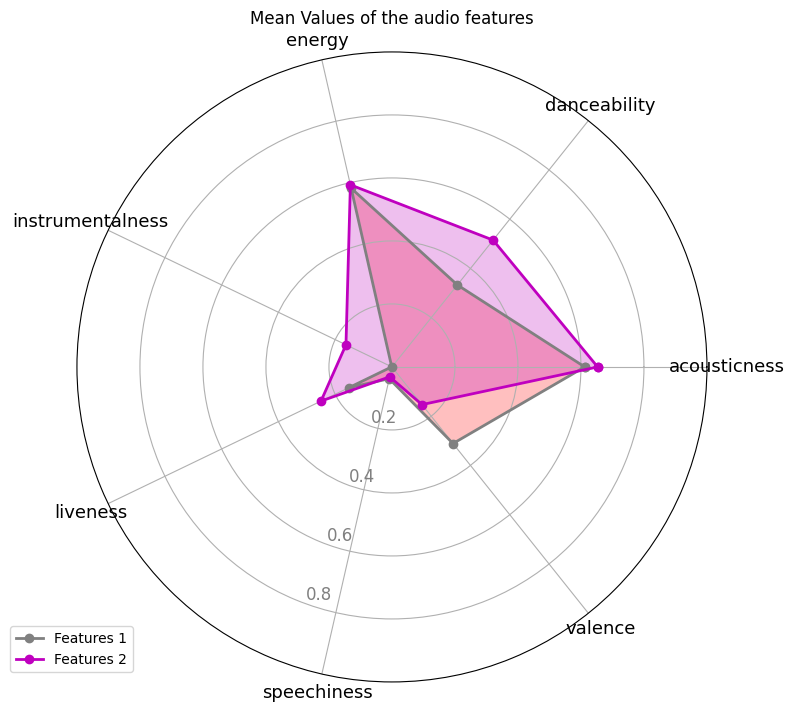

In [52]:
df2_features = get_features('1zVsw1SqQKgtzE4aqmE8nE')
goldenHrMIX_feat = get_features('6KxgptZSrQC4Vv21ZBOG7S')
goldenHr_feat = get_features(get_trackID('Golden Hour', 'JVKE'))
feature_plot2(goldenHrMIX_feat, goldenHr_feat)

In [28]:
print(get_trackID('idol', 'yoasobi'))

1zVsw1SqQKgtzE4aqmE8nE


In [5]:
def get_track_recommendation(seed_tracks, token):
    limit = 10
    recUrl = f"https://api.spotify.com/v1/recommendations?limit={limit}&seed_tracks={seed_tracks}"

    headers = {
        "Authorization": "Bearer " + token
    }

    res = requests.get(url=recUrl, headers = headers)
    return res.json()

In [6]:
json_response = get_track_recommendation('1zVsw1SqQKgtzE4aqmE8nE', SPOTIFY_TOKEN)

for i in json_response['tracks']:
    print(f"\"{i['name']}\" by ({i['artists'][0]['name']}) in ({i['id']})")

"Answer" by (Lilas Ikuta) in (0avegfB0TQ8cGDk9nuxcOQ)
"Romance" by (YOASOBI) in (0dSPApaBoWn6SA4GKWq9QK)
"Hyouriittai" by (YUZU) in (0v1vufjir4OE4iRckLMoLd)
"逃避行" by (Eve) in (6wnPWVgHI1e6BquACh2Ue5)
"TruE" by (HOYO-MiX) in (56aR8fCNORk8XIrQGo75IQ)
"ホワイトノイズ" by (OFFICIAL HIGE DANDISM) in (2wgYCc1xORV5CI8psWTroo)
"アイウエ" by (MAISONdes) in (7rqYTYi70xZBqEMAtSVhXc)
"ヒッチコック" by (ヨルシカ) in (153lRbNmhQZVi69kbhmjY8)
"Into The Night" by (YOASOBI) in (2vwzbB62VEfzCARNu9Nrrm)
"1・2・3" by (After the Rain) in (5a6YChdEs7LDu5RuCsxHXH)


In [11]:
rec_list = json_response['tracks']
rec_list = pd.DataFrame(rec_list)
rec_df = rec_list[['name', 'explicit', 'duration_ms', 'popularity']]

In [15]:
rec_list['album'][0]

{'album_type': 'ALBUM',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1qM11R4ylJyQiPJ0DffE9z'},
   'href': 'https://api.spotify.com/v1/artists/1qM11R4ylJyQiPJ0DffE9z',
   'id': '1qM11R4ylJyQiPJ0DffE9z',
   'name': 'Lilas Ikuta',
   'type': 'artist',
   'uri': 'spotify:artist:1qM11R4ylJyQiPJ0DffE9z'}],
 'available_markets': ['AR',
  'AU',
  'AT',
  'BE',
  'BO',
  'BR',
  'BG',
  'CA',
  'CL',
  'CO',
  'CR',
  'CY',
  'CZ',
  'DK',
  'DO',
  'DE',
  'EC',
  'EE',
  'SV',
  'FI',
  'FR',
  'GR',
  'GT',
  'HN',
  'HK',
  'HU',
  'IS',
  'IE',
  'IT',
  'LV',
  'LT',
  'LU',
  'MY',
  'MT',
  'MX',
  'NL',
  'NZ',
  'NI',
  'NO',
  'PA',
  'PY',
  'PE',
  'PH',
  'PL',
  'PT',
  'SG',
  'SK',
  'ES',
  'SE',
  'CH',
  'TW',
  'TR',
  'UY',
  'US',
  'GB',
  'AD',
  'LI',
  'MC',
  'ID',
  'JP',
  'TH',
  'VN',
  'RO',
  'IL',
  'ZA',
  'SA',
  'AE',
  'BH',
  'QA',
  'OM',
  'KW',
  'EG',
  'MA',
  'DZ',
  'TN',
  'LB',
  'JO',
  'PS',
  'IN',
  'BY',
  'KZ'

In [7]:
feat_df = pd.DataFrame()

for track in json_response['tracks']:
    audio_feat = sp.audio_features(track['id'])
    local_feat = pd.DataFrame(audio_feat, index=[0])
    local_feat.insert(0, 'track_id', track['id'])
    feat_df = pd.concat([feat_df, local_feat], ignore_index=True)

In [10]:
feat_df

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0avegfB0TQ8cGDk9nuxcOQ,0.566,0.509,0,-5.342,1,0.0367,0.428000,0.000000,0.1250,0.441,79.885,audio_features,0avegfB0TQ8cGDk9nuxcOQ,spotify:track:0avegfB0TQ8cGDk9nuxcOQ,https://api.spotify.com/v1/tracks/0avegfB0TQ8c...,https://api.spotify.com/v1/audio-analysis/0ave...,242106,4
1,0dSPApaBoWn6SA4GKWq9QK,0.643,0.945,1,-2.095,0,0.0445,0.088900,0.000000,0.2710,0.853,130.001,audio_features,0dSPApaBoWn6SA4GKWq9QK,spotify:track:0dSPApaBoWn6SA4GKWq9QK,https://api.spotify.com/v1/tracks/0dSPApaBoWn6...,https://api.spotify.com/v1/audio-analysis/0dSP...,166427,4
2,0v1vufjir4OE4iRckLMoLd,0.223,0.891,1,-3.626,0,0.1380,0.325000,0.000000,0.2870,0.333,159.888,audio_features,0v1vufjir4OE4iRckLMoLd,spotify:track:0v1vufjir4OE4iRckLMoLd,https://api.spotify.com/v1/tracks/0v1vufjir4OE...,https://api.spotify.com/v1/audio-analysis/0v1v...,336620,4
3,6wnPWVgHI1e6BquACh2Ue5,0.773,0.757,0,-6.748,1,0.0735,0.043100,0.000119,0.2910,0.932,122.039,audio_features,6wnPWVgHI1e6BquACh2Ue5,spotify:track:6wnPWVgHI1e6BquACh2Ue5,https://api.spotify.com/v1/tracks/6wnPWVgHI1e6...,https://api.spotify.com/v1/audio-analysis/6wnP...,176313,4
4,56aR8fCNORk8XIrQGo75IQ,0.437,0.807,5,-4.421,0,0.0781,0.035200,0.000003,0.2360,0.327,160.080,audio_features,56aR8fCNORk8XIrQGo75IQ,spotify:track:56aR8fCNORk8XIrQGo75IQ,https://api.spotify.com/v1/tracks/56aR8fCNORk8...,https://api.spotify.com/v1/audio-analysis/56aR...,187500,4
5,2wgYCc1xORV5CI8psWTroo,0.467,0.908,5,-5.831,0,0.0643,0.000582,0.000051,0.3860,0.477,143.160,audio_features,2wgYCc1xORV5CI8psWTroo,spotify:track:2wgYCc1xORV5CI8psWTroo,https://api.spotify.com/v1/tracks/2wgYCc1xORV5...,https://api.spotify.com/v1/audio-analysis/2wgY...,254839,4
6,7rqYTYi70xZBqEMAtSVhXc,0.545,0.972,11,-0.609,0,0.2030,0.181000,0.000000,0.0546,0.654,167.149,audio_features,7rqYTYi70xZBqEMAtSVhXc,spotify:track:7rqYTYi70xZBqEMAtSVhXc,https://api.spotify.com/v1/tracks/7rqYTYi70xZB...,https://api.spotify.com/v1/audio-analysis/7rqY...,222367,4
7,153lRbNmhQZVi69kbhmjY8,0.547,0.796,1,-3.785,1,0.0368,0.285000,0.000001,0.0487,0.797,169.901,audio_features,153lRbNmhQZVi69kbhmjY8,spotify:track:153lRbNmhQZVi69kbhmjY8,https://api.spotify.com/v1/tracks/153lRbNmhQZV...,https://api.spotify.com/v1/audio-analysis/153l...,222814,4
8,2vwzbB62VEfzCARNu9Nrrm,0.638,0.868,0,-5.701,0,0.0292,0.011200,0.000000,0.3420,0.824,130.046,audio_features,2vwzbB62VEfzCARNu9Nrrm,spotify:track:2vwzbB62VEfzCARNu9Nrrm,https://api.spotify.com/v1/tracks/2vwzbB62VEfz...,https://api.spotify.com/v1/audio-analysis/2vwz...,259661,4
9,5a6YChdEs7LDu5RuCsxHXH,0.423,0.973,0,-2.634,1,0.1340,0.124000,0.000000,0.3330,0.535,182.085,audio_features,5a6YChdEs7LDu5RuCsxHXH,spotify:track:5a6YChdEs7LDu5RuCsxHXH,https://api.spotify.com/v1/tracks/5a6YChdEs7LD...,https://api.spotify.com/v1/audio-analysis/5a6Y...,299393,4
